In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
import joblib

# Load Data

In [6]:
root_dir = './'
local_path_biome = '/bd_mir_bioma_without_xy.csv'
file_path_biome = root_dir + local_path_biome

df_biome = pd.read_csv(file_path_biome)

In [7]:
df_biome.shape[0]

720

In [8]:
df_biome_cerrado = df_biome.where(df_biome['Bioma'] == 'Cerrado').dropna(axis = 0)
df_biome_cerrado_data = df_biome_cerrado.drop(['ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_cerrado_target = pd.DataFrame(df_biome_cerrado, columns=['Carbon_gkg'])

In [9]:
df_biome_test = pd.read_csv('./bd_mir_biome_test_without_xy.csv')

In [10]:
df_biome_test_cerrado = df_biome_test.where(df_biome_test['Bioma'] == 'Cerrado').dropna(axis = 0)
df_biome_test_cerrado_data = df_biome_test_cerrado.drop(['ID','ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_test_cerrado_data = df_biome_test_cerrado_data.apply(lambda x:np.log(1/x))
df_biome_test_cerrado_target = pd.DataFrame(df_biome_test_cerrado, columns=['Carbon_gkg'])

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

X = pipeline.fit_transform(df_biome_test_cerrado_data)
df_biome_test_cerrado_data_tr = pd.DataFrame(X,columns=df_biome_test_cerrado_data.columns)

## Preprocess

In [12]:
df_biome_cerrado

,ID_Unico,Bioma,Carbon_gkg,4000,3995,3990,3985,3980,3975,3970,...,645,640,635,630,625,620,615,610,605,600
540,46391.0,Cerrado,8.120650,0.067848,0.068097,0.068127,0.067950,0.067897,0.067253,0.067410,...,0.004710,0.004873,0.005087,0.005297,0.005340,0.005243,0.005733,0.006303,0.006307,0.006297
541,46472.0,Cerrado,11.600928,0.059129,0.059770,0.059813,0.059763,0.059710,0.058723,0.059327,...,0.003680,0.004420,0.004563,0.004267,0.004613,0.005063,0.005067,0.004603,0.005347,0.005910
542,15458.0,Cerrado,7.500000,0.085311,0.085269,0.085147,0.084958,0.084738,0.084602,0.084451,...,0.007160,0.007552,0.007734,0.007311,0.007181,0.007490,0.007005,0.006998,0.006889,0.006655
543,38361.0,Cerrado,16.357309,0.059795,0.059066,0.058686,0.058818,0.058500,0.058192,0.057900,...,0.003993,0.004088,0.004046,0.003480,0.003558,0.004048,0.004036,0.003416,0.003708,0.003690
544,47023.0,Cerrado,0.335686,0.078134,0.077731,0.077400,0.077203,0.076789,0.076640,0.076211,...,0.003760,0.003790,0.003327,0.003620,0.003424,0.003210,0.004214,0.004210,0.004062,0.004140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,46979.0,Cerrado,0.607927,0.082106,0.082373,0.081570,0.081379,0.081248,0.080680,0.080040,...,0.004240,0.004310,0.004712,0.004180,0.004268,0.004070,0.004250,0.004390,0.003324,0.003510
716,46128.0,Cerrado,16.241299,0.057746,0.057957,0.057790,0.057857,0.057783,0.057617,0.057313,...,0.003820,0.003650,0.003620,0.004017,0.004110,0.004967,0.004980,0.005080,0.005703,0.005920
717,46426.0,Cerrado,16.821346,0.061914,0.062197,0.061873,0.062043,0.061897,0.061387,0.061340,...,0.005080,0.004780,0.004870,0.005367,0.005190,0.005357,0.006123,0.006300,0.006413,0.006603
718,47053.0,Cerrado,1.768857,0.101596,0.100358,0.100470,0.100411,0.100095,0.099720,0.099797,...,0.006270,0.006390,0.005524,0.005650,0.006380,0.004830,0.005197,0.005120,0.005588,0.004620


In [13]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

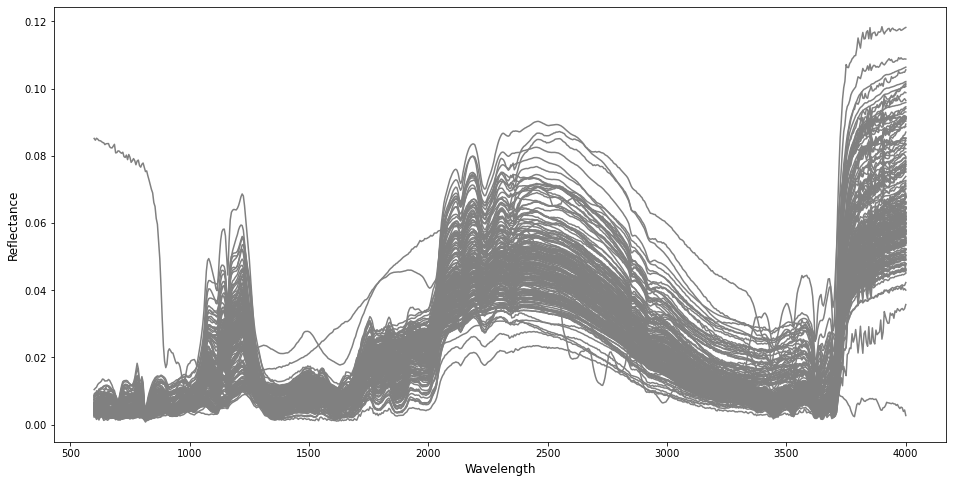

In [14]:
index_col = []
for i in range(600,4001,5):
    index_col.append(i)
index_col.sort(reverse=True)
plt.figure(figsize = (16, 8))
for i in range(len(df_biome_cerrado_data)):
    
    test_row = df_biome_cerrado_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [15]:
index_ex = df_biome_cerrado_data['600'].idxmax()
df_biome_cerrado_data = df_biome_cerrado_data.drop(index=index_ex)
df_biome_cerrado_target = df_biome_cerrado_target.drop(index=index_ex)

In [16]:
#Converting data from reflectance values to absorbance values
from math import log, exp

df_biome_cerrado_data = df_biome_cerrado_data.apply(lambda x:np.log(1/x))

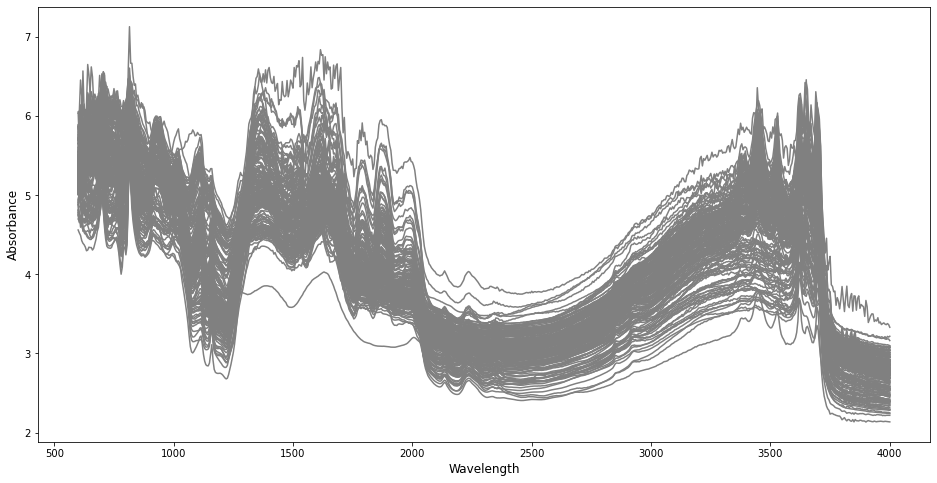

In [17]:
plt.figure(figsize = (16, 8))
for i in range(len(df_biome_cerrado_data)):
    
    test_row = df_biome_cerrado_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Absorbance', fontsize=12)
plt.show()

In [18]:
#Savitzky-Golay Filtering
import scipy
from scipy import signal

v = scipy.signal.savgol_filter(df_biome_cerrado_data,21,3)
for i in range(len(df_biome_cerrado_data)):
    for j in range(len(df_biome_cerrado_data.iloc[i])):
        df_biome_cerrado_data.iloc[i][j] = v[i][j]

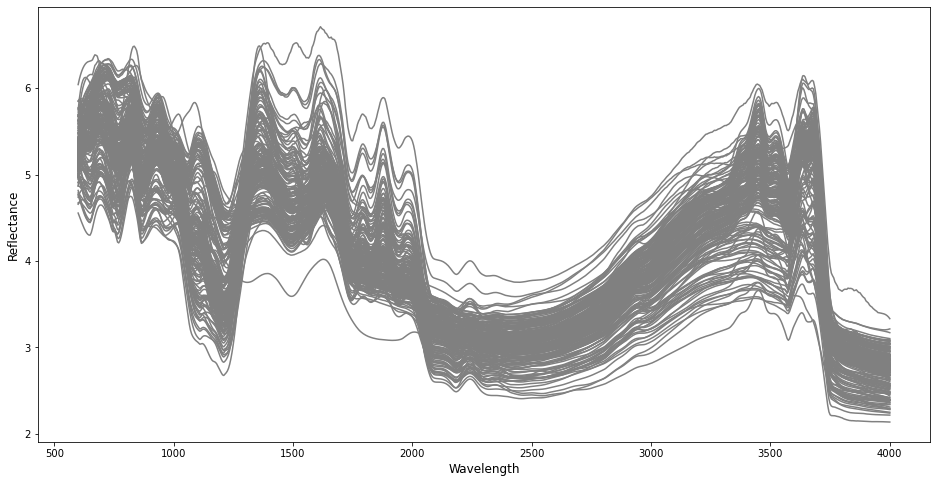

In [19]:
plt.figure(figsize = (16, 8))
for i in range(len(df_biome_cerrado_data)):
    
    test_row = df_biome_cerrado_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [20]:
# Standardizing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

X = pipeline.fit_transform(df_biome_cerrado_data)
df_biome_cerrado_data_tr = pd.DataFrame(X,columns=df_biome_cerrado_data.columns)
df_biome_cerrado_data_tr

,4000,3995,3990,3985,3980,3975,3970,3965,3960,3955,...,645,640,635,630,625,620,615,610,605,600
0,-0.206533,-0.214149,-0.220085,-0.224550,-0.227752,-0.229892,-0.231170,-0.231781,-0.231919,-0.231776,...,-0.454009,-0.444880,-0.446599,-0.462615,-0.497303,-0.555948,-0.644110,-0.765428,-0.916593,-1.080559
1,0.378909,0.363915,0.352528,0.344393,0.339119,0.336292,0.335485,0.336262,0.338179,0.340794,...,0.066823,0.062648,0.050725,0.028660,-0.006687,-0.059312,-0.133837,-0.234251,-0.360496,-0.502902
2,-1.188330,-1.195369,-1.201344,-1.206490,-1.210987,-1.214970,-1.218545,-1.221795,-1.224789,-1.227590,...,-1.497149,-1.503979,-1.509985,-1.513756,-1.512889,-1.503088,-1.476723,-1.421105,-1.318381,-1.151998
3,0.378665,0.389328,0.397647,0.403865,0.408218,0.410927,0.412212,0.412282,0.411347,0.409612,...,0.198265,0.253337,0.323514,0.411529,0.520714,0.654606,0.815567,1.001370,1.198872,1.378002
4,-0.811185,-0.800855,-0.791200,-0.782268,-0.774059,-0.766539,-0.759650,-0.753317,-0.747456,-0.741977,...,0.403431,0.453837,0.511775,0.575580,0.642942,0.710143,0.770702,0.813381,0.820705,0.772130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-1.050991,-1.033208,-1.019187,-1.008570,-1.000932,-0.995795,-0.992652,-0.990971,-0.990209,-0.989818,...,-0.184418,-0.124494,-0.042187,0.066234,0.205645,0.381805,0.599992,0.861023,1.152941,1.441032
174,0.501211,0.490808,0.482141,0.475075,0.469443,0.465051,0.461690,0.459140,0.457177,0.455571,...,0.455813,0.408339,0.347676,0.270798,0.173751,0.051624,-0.100848,-0.287005,-0.502778,-0.728748
175,0.194059,0.187277,0.181898,0.177773,0.174740,0.172623,0.171241,0.170407,0.169934,0.169631,...,-0.332245,-0.362543,-0.405682,-0.463794,-0.539511,-0.635620,-0.753938,-0.892539,-1.040709,-1.174294
176,-1.929361,-1.932635,-1.933855,-1.933491,-1.931924,-1.929458,-1.926349,-1.922816,-1.919057,-1.915256,...,-1.043048,-0.986880,-0.915305,-0.826788,-0.718952,-0.588491,-0.431502,-0.245143,-0.032076,0.192251


## Model

In [21]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import joblib
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [22]:
forest_reg_cerrado_setup = RandomForestRegressor()
param_grid = {'n_estimators': [10,100]}
gsearch = GridSearchCV(forest_reg_cerrado_setup, param_grid)
forest_reg_cerrado = gsearch.fit(df_biome_cerrado_data_tr, df_biome_cerrado_target)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

In [23]:
Y_predict_cerrado_forest = forest_reg_cerrado.predict(df_biome_test_cerrado_data_tr)
m = mean_squared_error(df_biome_test_cerrado_target, Y_predict_cerrado_forest)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_cerrado_target, Y_predict_cerrado_forest)))

root_mean_squared_error: 3.4174356881774246
R2: 0.7166298728908527


In [24]:
joblib.dump(forest_reg_cerrado, './model/cerrado/forest_reg_cerrado.pkl')

['./model/cerrado/forest_reg_cerrado.pkl']

D:\softwareForLearn\anaconda\inss\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<AxesSubplot:>

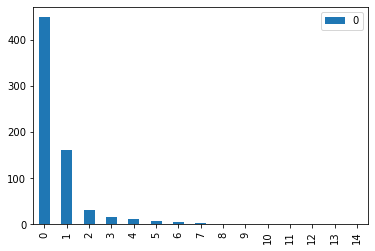

In [25]:
#PCA
df_biome_cerrado_data_tr_ = df_biome_cerrado_data_tr
ew_cerrado, ev_cerrado = np.linalg.eig(np.cov(df_biome_cerrado_data_tr_.T))
ew_cerrado_order = np.argsort(ew_cerrado)[::-1]
ew_cerrado_sort = ew_cerrado[ew_cerrado_order]
ev_cerrado_sort = ev_cerrado[:,ew_cerrado_order]
pd.DataFrame(ew_cerrado_sort[0:15]).plot(kind='bar')

In [26]:
from sklearn.decomposition import PCA
from sklearn import linear_model

In [27]:
pca_cerrado = PCA(n_components=10)
pca_cerrado.fit(df_biome_cerrado_data_tr)
df_biome_cerrado_data_tr_pca = pca_cerrado.transform(df_biome_cerrado_data_tr)

ols_cerrado = linear_model.LinearRegression()
ols_cerrado.fit(df_biome_cerrado_data_tr_pca, df_biome_cerrado_target)

LinearRegression()

In [28]:
df_biome_test_cerrado_data_tr_pca = pca_cerrado.transform(df_biome_test_cerrado_data_tr)
Y_predict_cerrado_pca = ols_cerrado.predict(df_biome_test_cerrado_data_tr_pca)
m = mean_squared_error(df_biome_test_cerrado_target, Y_predict_cerrado_pca)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_cerrado_target, Y_predict_cerrado_pca)))

root_mean_squared_error: 2.5738441369912124
R2: 0.8392622620981401


In [29]:
joblib.dump(pca_cerrado, './model/cerrado/pca_cerrado.pkl')

['./model/cerrado/pca_cerrado.pkl']

In [30]:
joblib.dump(ols_cerrado, './model/cerrado/ols_cerrado.pkl')

['./model/cerrado/ols_cerrado.pkl']

In [31]:
#PLSR
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

In [32]:
pls_model_cerrado_setup = PLSRegression(scale=True)
param_grid = {'n_components': range(1,20)}
gsearch = GridSearchCV(pls_model_cerrado_setup, param_grid)
pls_model_cerrado = gsearch.fit(df_biome_cerrado_data_tr, df_biome_cerrado_target)

In [33]:
Y_predict_cerrado_pls = pls_model_cerrado.predict(df_biome_test_cerrado_data_tr)
m = mean_squared_error(df_biome_test_cerrado_target, Y_predict_cerrado_pls)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_cerrado_target, Y_predict_cerrado_pls)))

root_mean_squared_error: 2.564780617129289
R2: 0.840392310796982


In [34]:
joblib.dump(pls_model_cerrado, './model/cerrado/pls_model_cerrado.pkl')

['./model/cerrado/pls_model_cerrado.pkl']

In [381]:
# Use Lasso to find important features
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV